# Python for Astronomers - Full Example

## Plotting stellar spectra with varying stellar parameters ($T_{eff}$, $\log g$, $v\sin i$)

Import all needed modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
# NP Necessary imports

Read in stellar models and extract fluxes and vaccum wavelengths.

In [2]:
cdir = '/d/hya1/BS/model_spectra/conv/'
# NP Convolved model directory

cnames = np.array(os.listdir(cdir))
# NP Convolved model names

cifiles = [n[-4:] == '.txt' for n in cnames]
# NP Finding indices of files ending in .txt

cmodel = [np.loadtxt(cdir +i, usecols = (0, 1)) for i in cnames[cifiles]]
# NP Reading in model data

ctemps = np.array([float(n[-12:-7]) for n in cnames[cifiles]])
# NP Finding temperature information for each model

cgs = np.array([float(n[-7:-4]) /100 for n in cnames[cifiles]])
# NP Finding gravity information for each model

vsini = np.array([float(n[4:-12]) for n in cnames[cifiles]])
# NP Reading vsini information from names

cwavlsvac = [i.T[0] for i in cmodel]
# NP Reading in vaccuum wavelengths

cints = [i.T[1] for i in cmodel]
# NP Reading in normalized fluxes

Convert vaccum wavelengths into air wavelengths at Apache Point Observatory

In [3]:
# NP Converting to air wavelengths adjusting for different indices of
# NP refraction in air of different wavelengths following this guide:
# NP https://emtoolbox.nist.gov/Wavelength/Documentation.asp#EdlenorCiddor
s = [1e4 /w for w in cwavlsvac]
P = 73251
# NP Pressure at APO in Pascals

T = 20
# NP Approximate temperature at APO in Celsius

A = 8342.54
B = 2406147
C = 15998
D = 96095.43
E = 0.601
F = 0.00972
G = 0.003661
# NP Constants for conversions

nstp = [1 +1e-8 *(A +B /(130 -es **2) +C /(38.9 -es **2)) for es in s]
# NP Index of refraction of air at STP for different wavelengths

X = (1 +1e-8 *(E -F *T) *P) /(1 +G *T)
n_tp = [1 +P *(n -1) *X /D for n in nstp]
# NP Index of refraction of air at the temperature and pressure of APO

cwavls = [cwavlsvac[i] /n_tp[i] for i in range(len(n_tp))]
# NP Converting to air wavelengths

Plot stellar spectra, including observed elemental absorption lines, with differing surface gravities.

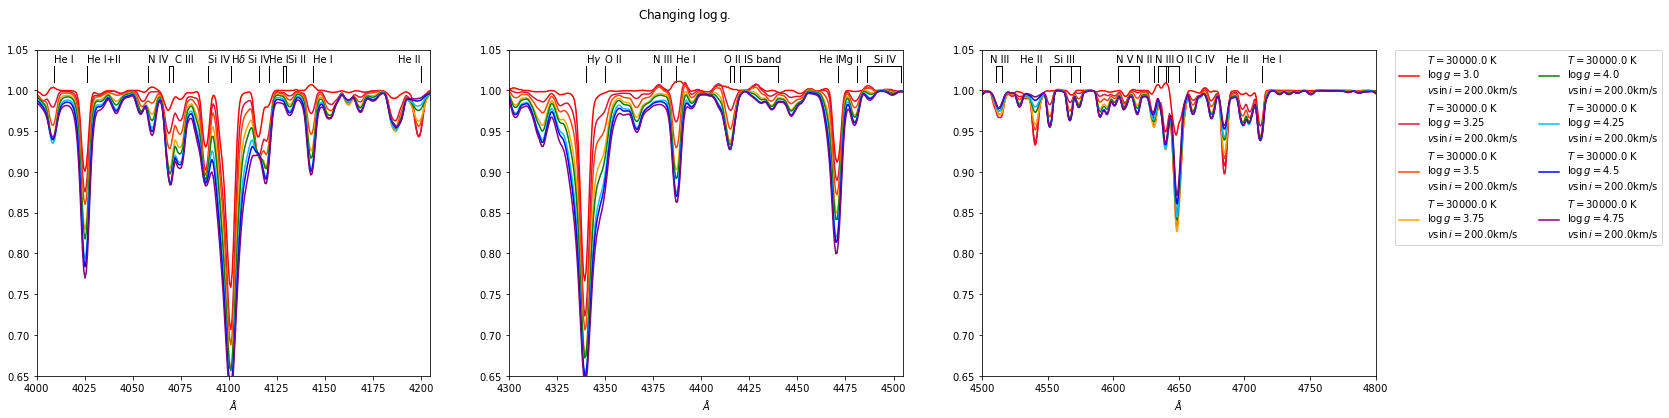

In [4]:
colors = ['red', 'crimson', 'orangered', 'orange', 'green', 'deepskyblue', 'blue', 'purple', 'black']
ci = 0
plt.figure(facecolor = 'white', figsize = [24, 6])

plt.subplot(1, 3, 1)       
plt.axvline(x=4009, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4009, 1.035, r'He I')
plt.axvline(x=4026, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4026, 1.035, r'He I+II')
plt.axvline(x=4058, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4058, 1.035, r'N IV')
plt.axvline(x=4069, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4071, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4069, xmax = 4071, color = 'k', linewidth = 1)
plt.text(4072, 1.035, r'C III')
plt.axvline(x=4089, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4089, 1.035, r'Si IV')
plt.axvline(x=4101, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4101, 1.035, r'H$\delta$')
plt.axvline(x=4116, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4116-6, 1.035, r'Si IV')
plt.axvline(x=4121, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4121, 1.035, r'He I')
plt.axvline(x=4128, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4130, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4128, xmax = 4130, color = 'k', linewidth = 1)
plt.text(4129+2, 1.035, r'Si II')
plt.axvline(x=4144, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4144, 1.035, r'He I')
plt.axvline(x=4200, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4188, 1.035, r'He II')
plt.xlabel(r'$\AA$')

plt.subplot(1, 3, 2)
plt.axvline(x=4340, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4340, 1.035, r'H$\gamma$')
plt.axvline(x=4350, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4350, 1.035, r'O II')
plt.axvline(x=4379, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4375, 1.035, r'N III')
plt.axvline(x=4387, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4387, 1.035, r'He I')
plt.axvline(x=4415, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4417, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4415, xmax = 4417, color = 'k', linewidth = 1)
plt.text(4412, 1.035, r'O II')
plt.axvline(x=4420, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4440, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4420, xmax = 4440, color = 'k', linewidth = 1)
plt.text(4422, 1.035, r'IS band')
plt.axvline(x=4471, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4471-10, 1.035, r'He I')
plt.axvline(x=4481, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4481-10, 1.035, r'Mg II')
plt.axvline(x=4486, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4504, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4486, xmax = 4504, color = 'k', linewidth = 1)
plt.text(4490, 1.035, r'Si IV')
plt.xlabel(r'$\AA$')

plt.subplot(1, 3, 3)
plt.axvline(x=4511, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4515, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4511, xmax = 4515, color = 'k', linewidth = 1)
plt.text(4506, 1.035, r'N III')
plt.axvline(x=4541, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4541-12, 1.035, r'He II')
plt.axvline(x=4552, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4568, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4575, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4552, xmax = 4575, color = 'k', linewidth = 1)
plt.text(4555, 1.035, r'Si III')
plt.axvline(x=4604, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4620, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4604, xmax = 4620, color = 'k', linewidth = 1)
plt.text(4602, 1.035, r'N V')
plt.axvline(x=4634, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4640, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4642, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4634, xmax = 4642, color = 'k', linewidth = 1)
plt.text(4632, 1.035, r'N III')
plt.axvline(x=4640, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4650, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4640, xmax = 4650, color = 'k', linewidth = 1)
plt.text(4648, 1.035, r'O II')
plt.axvline(x=4631, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4631-14, 1.035, r'N II')
plt.axvline(x=4662, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4662, 1.035, r'C IV')
plt.axvline(x=4686, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4686, 1.035, r'He II')
plt.axvline(x=4713, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4713, 1.035, r'He I')
plt.xlabel(r'$\AA$')

for i in range(len(cnames)):
    if ctemps[i] == 30000 and cgs[i] > 0 and vsini[i] == 200:
        plt.subplot(1, 3, 1)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')

        plt.xlim(4000, 4205)
        plt.ylim(0.65, 1.05)
        
        plt.subplot(1, 3, 2)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')
        plt.xlim(4300, 4505)
        plt.ylim(0.65, 1.05)
        
        plt.subplot(1, 3, 3)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')
        ci += 1
        plt.xlim(4500, 4800)
        plt.ylim(0.65, 1.05)
        
plt.legend(bbox_to_anchor=(1.05, 1),
            loc='upper left', ncol = 2, borderaxespad=0.)

plt.suptitle('Changing $\log$g.')
plt.show()

Plot stellar spectra, including observed elemental absorption lines, with differing temperatures.

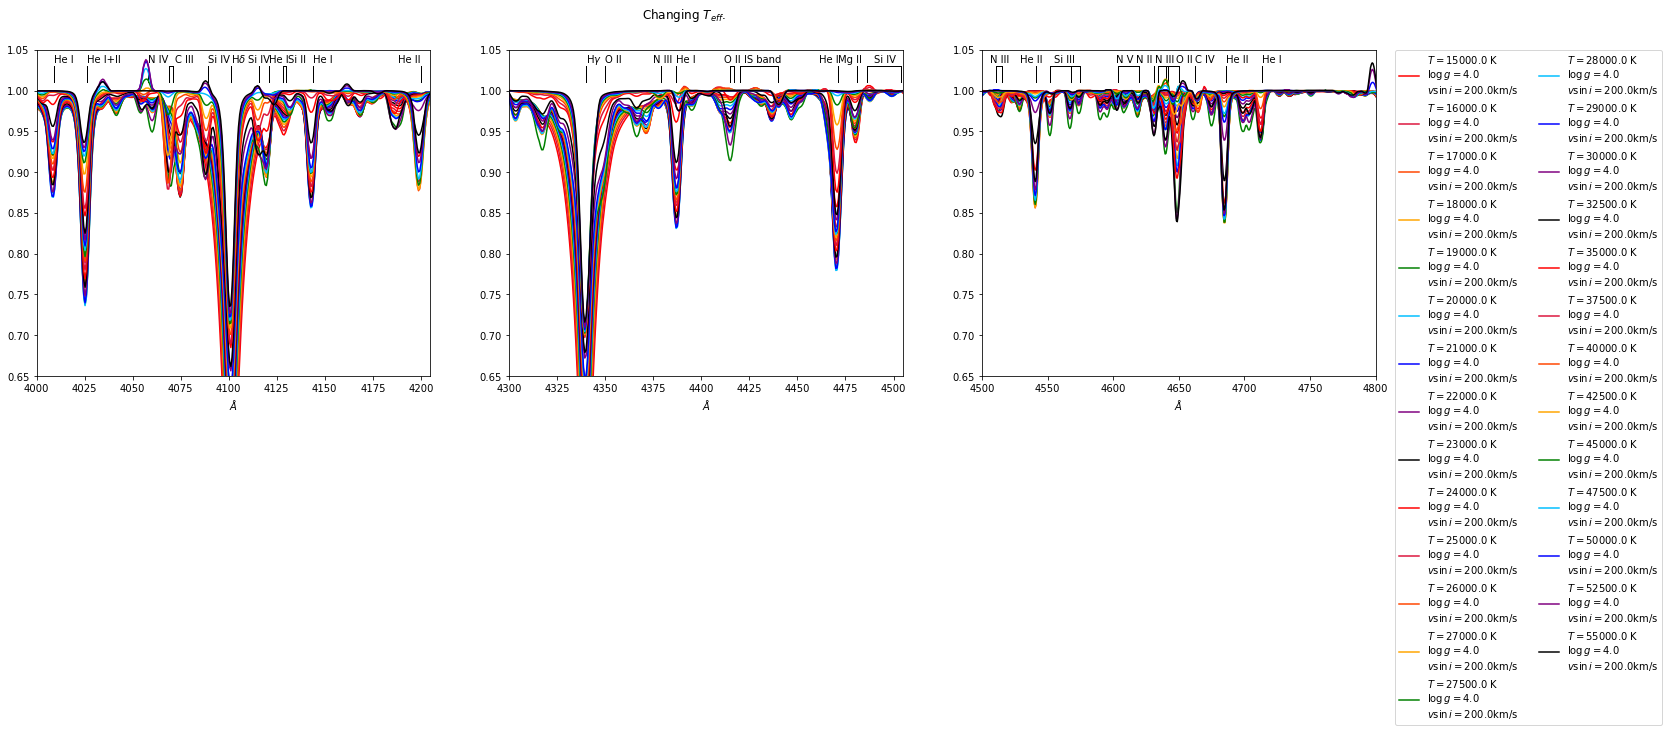

In [5]:
colors = ['red', 'crimson', 'orangered', 'orange', 'green', 'deepskyblue', 'blue', 'purple', 'black']
ci = 0
plt.figure(facecolor = 'white', figsize = [24, 6])

plt.subplot(1, 3, 1)       
plt.axvline(x=4009, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4009, 1.035, r'He I')
plt.axvline(x=4026, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4026, 1.035, r'He I+II')
plt.axvline(x=4058, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4058, 1.035, r'N IV')
plt.axvline(x=4069, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4071, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4069, xmax = 4071, color = 'k', linewidth = 1)
plt.text(4072, 1.035, r'C III')
plt.axvline(x=4089, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4089, 1.035, r'Si IV')
plt.axvline(x=4101, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4101, 1.035, r'H$\delta$')
plt.axvline(x=4116, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4116-6, 1.035, r'Si IV')
plt.axvline(x=4121, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4121, 1.035, r'He I')
plt.axvline(x=4128, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4130, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4128, xmax = 4130, color = 'k', linewidth = 1)
plt.text(4129+2, 1.035, r'Si II')
plt.axvline(x=4144, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4144, 1.035, r'He I')
plt.axvline(x=4200, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4188, 1.035, r'He II')
plt.xlabel(r'$\AA$')

plt.subplot(1, 3, 2)
plt.axvline(x=4340, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4340, 1.035, r'H$\gamma$')
plt.axvline(x=4350, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4350, 1.035, r'O II')
plt.axvline(x=4379, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4375, 1.035, r'N III')
plt.axvline(x=4387, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4387, 1.035, r'He I')
plt.axvline(x=4415, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4417, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4415, xmax = 4417, color = 'k', linewidth = 1)
plt.text(4412, 1.035, r'O II')
plt.axvline(x=4420, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4440, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4420, xmax = 4440, color = 'k', linewidth = 1)
plt.text(4422, 1.035, r'IS band')
plt.axvline(x=4471, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4471-10, 1.035, r'He I')
plt.axvline(x=4481, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4481-10, 1.035, r'Mg II')
plt.axvline(x=4486, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4504, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4486, xmax = 4504, color = 'k', linewidth = 1)
plt.text(4490, 1.035, r'Si IV')
plt.xlabel(r'$\AA$')

plt.subplot(1, 3, 3)
plt.axvline(x=4511, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4515, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4511, xmax = 4515, color = 'k', linewidth = 1)
plt.text(4506, 1.035, r'N III')
plt.axvline(x=4541, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4541-12, 1.035, r'He II')
plt.axvline(x=4552, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4568, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4575, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4552, xmax = 4575, color = 'k', linewidth = 1)
plt.text(4555, 1.035, r'Si III')
plt.axvline(x=4604, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4620, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4604, xmax = 4620, color = 'k', linewidth = 1)
plt.text(4602, 1.035, r'N V')
plt.axvline(x=4634, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4640, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4642, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4634, xmax = 4642, color = 'k', linewidth = 1)
plt.text(4632, 1.035, r'N III')
plt.axvline(x=4640, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4650, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4640, xmax = 4650, color = 'k', linewidth = 1)
plt.text(4648, 1.035, r'O II')
plt.axvline(x=4631, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4631-14, 1.035, r'N II')
plt.axvline(x=4662, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4662, 1.035, r'C IV')
plt.axvline(x=4686, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4686, 1.035, r'He II')
plt.axvline(x=4713, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4713, 1.035, r'He I')
plt.xlabel(r'$\AA$')

for i in range(len(cnames)):
    if ctemps[i] > 0 and cgs[i] == 4 and vsini[i] == 200:
        plt.subplot(1, 3, 1)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')

        plt.xlim(4000, 4205)
        plt.ylim(0.65, 1.05)
        
        plt.subplot(1, 3, 2)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')
        plt.xlim(4300, 4505)
        plt.ylim(0.65, 1.05)
        
        plt.subplot(1, 3, 3)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')
        ci += 1
        plt.xlim(4500, 4800)
        plt.ylim(0.65, 1.05)
        
plt.legend(bbox_to_anchor=(1.05, 1),
            loc='upper left', ncol = 2, borderaxespad=0.)

plt.suptitle('Changing $T_{eff}$.')
plt.show()

Plot stellar spectra, including observed elemental absorption lines, with differing rotational broadening.

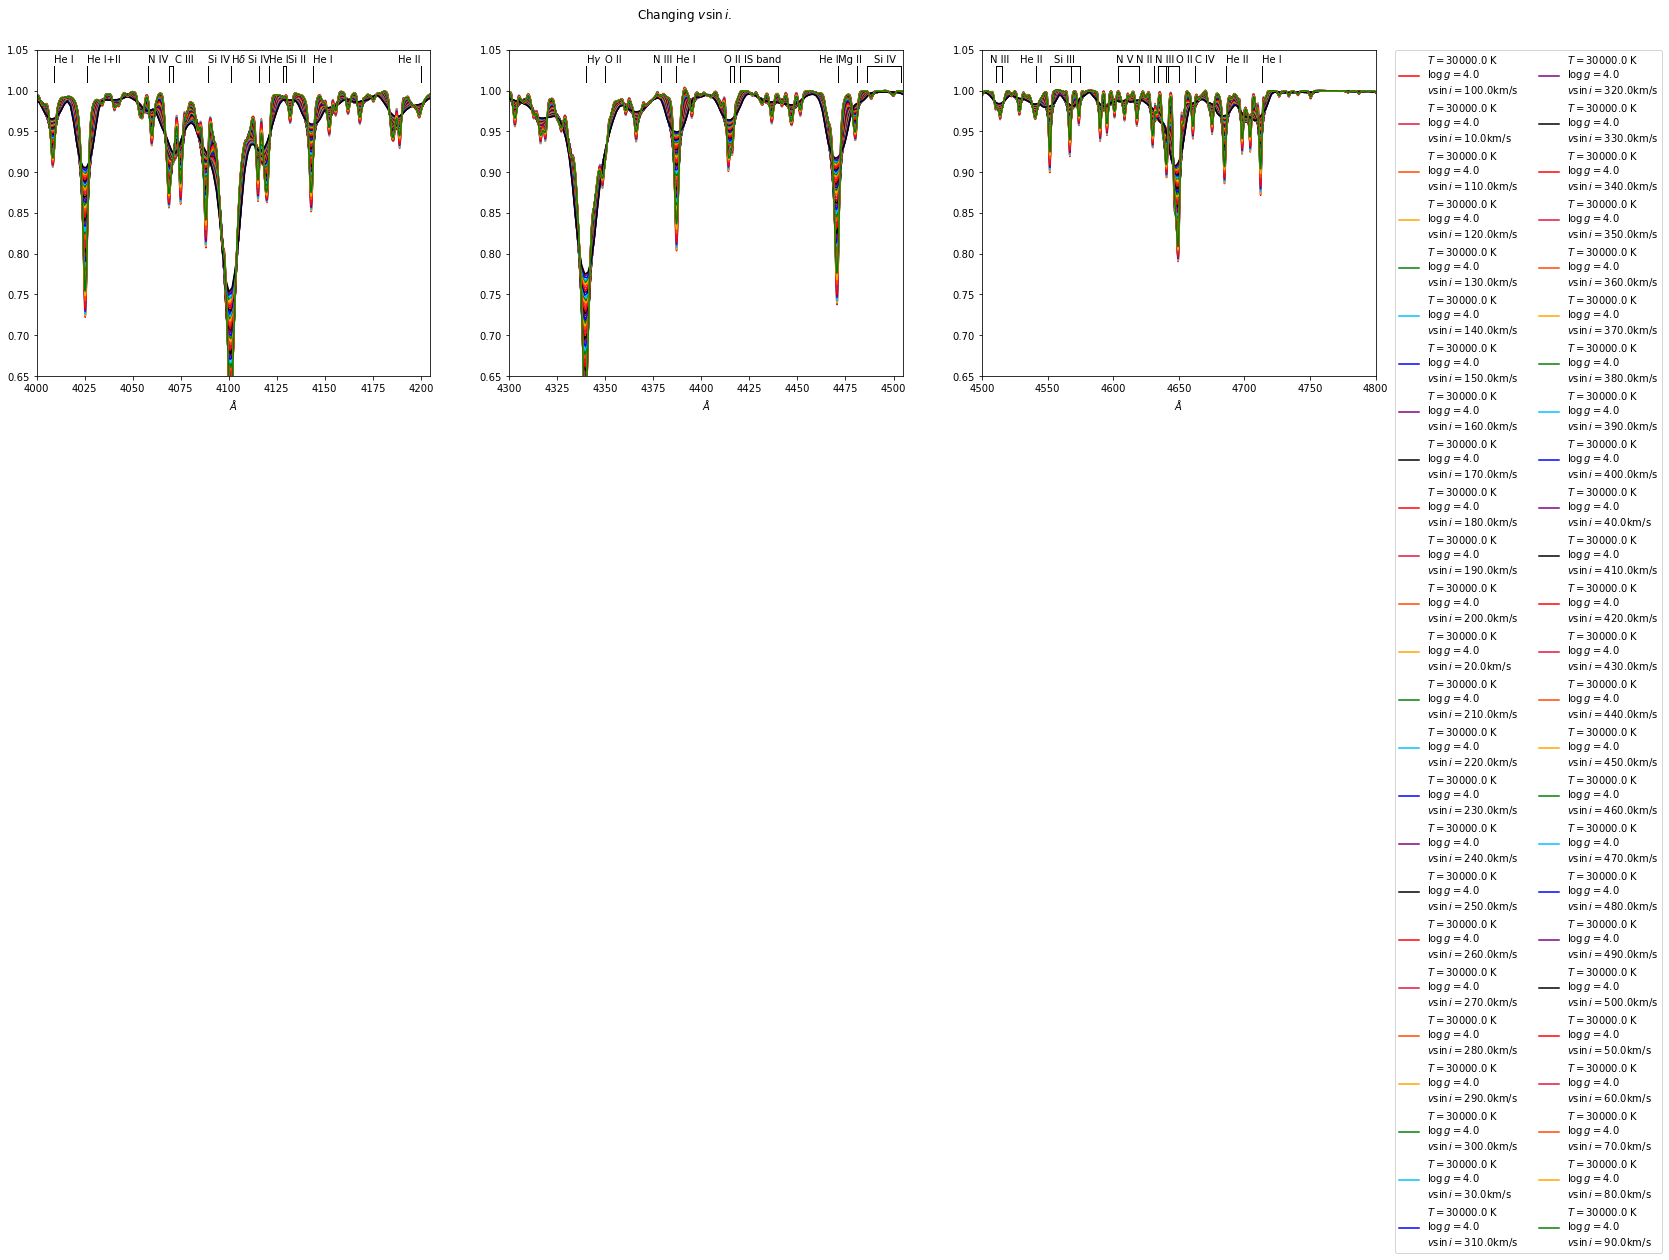

In [6]:
colors = ['red', 'crimson', 'orangered', 'orange', 'green', 'deepskyblue', 'blue', 'purple', 'black']
ci = 0
plt.figure(facecolor = 'white', figsize = [24, 6])

plt.subplot(1, 3, 1)       
plt.axvline(x=4009, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4009, 1.035, r'He I')
plt.axvline(x=4026, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4026, 1.035, r'He I+II')
plt.axvline(x=4058, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4058, 1.035, r'N IV')
plt.axvline(x=4069, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4071, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4069, xmax = 4071, color = 'k', linewidth = 1)
plt.text(4072, 1.035, r'C III')
plt.axvline(x=4089, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4089, 1.035, r'Si IV')
plt.axvline(x=4101, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4101, 1.035, r'H$\delta$')
plt.axvline(x=4116, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4116-6, 1.035, r'Si IV')
plt.axvline(x=4121, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4121, 1.035, r'He I')
plt.axvline(x=4128, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4130, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4128, xmax = 4130, color = 'k', linewidth = 1)
plt.text(4129+2, 1.035, r'Si II')
plt.axvline(x=4144, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4144, 1.035, r'He I')
plt.axvline(x=4200, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4188, 1.035, r'He II')
plt.xlabel(r'$\AA$')

plt.subplot(1, 3, 2)
plt.axvline(x=4340, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4340, 1.035, r'H$\gamma$')
plt.axvline(x=4350, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4350, 1.035, r'O II')
plt.axvline(x=4379, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4375, 1.035, r'N III')
plt.axvline(x=4387, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4387, 1.035, r'He I')
plt.axvline(x=4415, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4417, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4415, xmax = 4417, color = 'k', linewidth = 1)
plt.text(4412, 1.035, r'O II')
plt.axvline(x=4420, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4440, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4420, xmax = 4440, color = 'k', linewidth = 1)
plt.text(4422, 1.035, r'IS band')
plt.axvline(x=4471, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4471-10, 1.035, r'He I')
plt.axvline(x=4481, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4481-10, 1.035, r'Mg II')
plt.axvline(x=4486, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4504, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4486, xmax = 4504, color = 'k', linewidth = 1)
plt.text(4490, 1.035, r'Si IV')
plt.xlabel(r'$\AA$')

plt.subplot(1, 3, 3)
plt.axvline(x=4511, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4515, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4511, xmax = 4515, color = 'k', linewidth = 1)
plt.text(4506, 1.035, r'N III')
plt.axvline(x=4541, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4541-12, 1.035, r'He II')
plt.axvline(x=4552, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4568, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4575, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4552, xmax = 4575, color = 'k', linewidth = 1)
plt.text(4555, 1.035, r'Si III')
plt.axvline(x=4604, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4620, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4604, xmax = 4620, color = 'k', linewidth = 1)
plt.text(4602, 1.035, r'N V')
plt.axvline(x=4634, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4640, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4642, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4634, xmax = 4642, color = 'k', linewidth = 1)
plt.text(4632, 1.035, r'N III')
plt.axvline(x=4640, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.axvline(x=4650, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.hlines(y = 1.03, xmin = 4640, xmax = 4650, color = 'k', linewidth = 1)
plt.text(4648, 1.035, r'O II')
plt.axvline(x=4631, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4631-14, 1.035, r'N II')
plt.axvline(x=4662, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4662, 1.035, r'C IV')
plt.axvline(x=4686, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4686, 1.035, r'He II')
plt.axvline(x=4713, color= 'k', linewidth = 1, ymax = 0.95, ymin = 0.90)
plt.text(4713, 1.035, r'He I')
plt.xlabel(r'$\AA$')

for i in range(len(cnames)):
    if ctemps[i] == 30000 and cgs[i] == 4 and vsini[i] > 0:
        plt.subplot(1, 3, 1)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')

        plt.xlim(4000, 4205)
        plt.ylim(0.65, 1.05)
        
        plt.subplot(1, 3, 2)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')
        plt.xlim(4300, 4505)
        plt.ylim(0.65, 1.05)
        
        plt.subplot(1, 3, 3)
        plt.plot(cwavls[i], cints[i], color = colors[ci % len(colors)], \
                 label = r'$T=$' +str(ctemps[i]) +' K\n' +r'$\log g=$' \
                 +str(cgs[i]) +'\n' +r'$v\sin i=$' +str(vsini[i]) +'km/s')
        ci += 1
        plt.xlim(4500, 4800)
        plt.ylim(0.65, 1.05)
        
plt.legend(bbox_to_anchor=(1.05, 1),
            loc='upper left', ncol = 2, borderaxespad=0.)

plt.suptitle('Changing $v\sin i$.')
plt.show()